In [1]:
import torch

In [2]:
print(torch.__version__)

0.3.0.post4


In [3]:
%matplotlib inline

from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator

### Getting Started

Tensors are similar to numpy's ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [5]:
x = torch.Tensor(5, 3)
x


  0.0000   0.0000   0.0000
  0.0000      nan   0.0000
  0.0000   0.0000   0.0000
  0.0000   0.0000   0.0000
 11.4495   0.0002   0.0000
[torch.FloatTensor of size 5x3]

In [6]:
x = torch.rand(5, 3)
x


 0.1911  0.7236  0.2290
 0.8889  0.2984  0.0033
 0.0527  0.7869  0.5271
 0.0844  0.6725  0.1137
 0.8606  0.6525  0.9573
[torch.FloatTensor of size 5x3]

In [7]:
x.size()

torch.Size([5, 3])

In [8]:
y = torch.rand(5, 3)

In [9]:
x + y


 0.4438  1.1500  1.0032
 1.0597  1.2492  0.8147
 0.1087  1.3058  1.3467
 0.5362  1.2066  0.7172
 1.1196  1.0609  1.2026
[torch.FloatTensor of size 5x3]

In [10]:
torch.add(x, y)


 0.4438  1.1500  1.0032
 1.0597  1.2492  0.8147
 0.1087  1.3058  1.3467
 0.5362  1.2066  0.7172
 1.1196  1.0609  1.2026
[torch.FloatTensor of size 5x3]

In [11]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 0.4438  1.1500  1.0032
 1.0597  1.2492  0.8147
 0.1087  1.3058  1.3467
 0.5362  1.2066  0.7172
 1.1196  1.0609  1.2026
[torch.FloatTensor of size 5x3]

In [12]:
# anything ending in '_' is an in-place operation
y.add_(x) # adds x to y in-place


 0.4438  1.1500  1.0032
 1.0597  1.2492  0.8147
 0.1087  1.3058  1.3467
 0.5362  1.2066  0.7172
 1.1196  1.0609  1.2026
[torch.FloatTensor of size 5x3]

### ========== STOP CODING HERE ==========

In [14]:
# standard numpy-like indexing with all bells and whistles
x[:,1]


 0.7070
 0.3874
 0.2915
 0.7388
 0.6206
[torch.FloatTensor of size 5]

### Numpy Bridge

The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

#### Converting torch Tensor to numpy Array

In [13]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [14]:
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [15]:
a.add_(1)
print(a)
print(b) # see how the numpy array changed in value


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


#### Converting numpy Array to torch Tensor

In [16]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) # see how changing the np array changed the torch Tensor automatically

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



### CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` function.

In [15]:
x = x.cuda()
y = y.cuda()

x+y


 2.2205  2.0297  0.4631
 2.2637  1.6877  1.1020
 2.0385  1.2619  1.2454
 2.5860  2.0047  0.9544
 0.8729  2.1788  1.0442
[torch.cuda.FloatTensor of size 5x3 (GPU 0)]

## Autograd: automatic differentiation

Central to all neural networks in PyTorch is the `autograd` package.

The `autograd` package provides automatic differentiation for all operations on Tensors.  
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different. 

`autograd.Variable` is the central class of the package. 
It wraps a Tensor, and supports nearly all of operations defined on it. Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. 

In [53]:
x = Variable(torch.ones(2, 2), requires_grad = True); x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [54]:
y = x + 2; y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [55]:
y.creator

In [56]:
z = y * y * 3; z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [57]:
out = z.mean(); out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [58]:
# You never have to look at these in practice - this is just showing how the
#   computation graph is stored
print(out.creator.previous_functions[0][0])
print(out.creator.previous_functions[0][0].previous_functions[0][0])

In [59]:
out.backward()

In [60]:
# d(out)/dx
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

You should have got a matrix of `4.5`.

Because PyTorch is a dynamic computation framework, we can take the gradients of all kinds of interesting computations, even loops!

In [34]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

In [35]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [36]:
y

Variable containing:
 1479.7150
  466.4501
   24.2099
[torch.FloatTensor of size 3]

In [37]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

In [38]:
x.grad

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]

## Neural Networks

Neural networks can be constructed using the `torch.nn` package.

An `nn.Module` contains layers, and a method `forward(input)`that returns the `output`.

In [81]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120) # like keras' Dense()
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        return reduce(operator.mul, x.size()[1:])

In [82]:
net = Net(); net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`.

The learnable parameters of a model are returned by `net.parameters()`

In [83]:
net.cuda();

In [84]:
params = list(net.parameters())
len(params), params[0].size()

(10, torch.Size([6, 1, 5, 5]))

The input to the forward is a `Variable`, and so is the output.

In [85]:
input = Variable(torch.randn(1, 1, 32, 32)).cuda()
out = net(input); out

Variable containing:
 0.0182  0.2793 -0.0525  0.2080 -0.0320 -0.0230  0.1369  0.0551  0.0196  0.0240
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

In [86]:
net.zero_grad() # zeroes the gradient buffers of all parameters
out.backward(torch.randn(1, 10).cuda()) # backprops with random gradients

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target. There are [several different loss functions under the nn package](http://pytorch.org/docs/nn.html#loss-functions). A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target.

In [87]:
output = net(input)
target = Variable(torch.range(1, 10)).cuda()  # a dummy target, for example
loss = nn.MSELoss()(output, target); loss

Variable containing:
 37.9610
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Now, if you follow `loss` in the backward direction, using it's `.creator` attribute, you will see a graph of computations that looks like this:

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their `.grad` Variable accumulated with the gradient.
       

In [88]:
# now we shall call loss.backward(), and have a look at gradients before and after
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.cuda.FloatTensor of size 6 (GPU 0)]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -2.1977
 -5.5820
  1.5586
 -7.5659
 -3.8961
 -1.8429
[torch.cuda.FloatTensor of size 6 (GPU 0)]



In [89]:
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = nn.MSELoss()(output, target)
loss.backward()
optimizer.step() # Does the update

## Example complete process

For vision, there is a package called `torch.vision`, that 
has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images.

For this tutorial, we will use the CIFAR10 dataset. 

### Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using `torchvision`
1. Define a Convolution Neural Network
1. Define a loss function
1. Train the network on the training data
1. Test the network on the test data

### 1. Loading and normalizing CIFAR10

Using `torch.vision`, it's extremely easy to load CIFAR10. 

In [14]:
import torchvision
from torchvision import transforms, datasets

In [15]:
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, 
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [16]:
def imshow(img):
    plt.imshow(np.transpose((img / 2 + 0.5).numpy(), (1,2,0)))

horse  bird   dog  frog


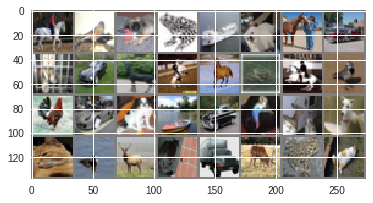

In [17]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

### 2. Define a Convolution Neural Network

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().cuda()

### 2. Define a Loss function and optimizer

In [19]:
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 3. Train the network

This is when things start to get interesting.

We simply have to loop over our data iterator, and feed the inputs to 
the network and optimize

In [20]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0

We will check what the model has learned by predicting the class label, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

First, let's display an image from the test set to get familiar.

'  cat  ship  ship plane'

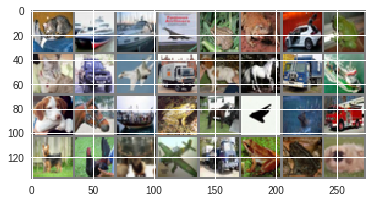

In [21]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
' '.join('%5s'%classes[labels[j]] for j in range(4))

Okay, now let us see what the neural network thinks these examples above are:

In [23]:
outputs = net(Variable(images).cuda())
_, predicted = torch.max(outputs.data, 1)

In [30]:
' '.join('%5s'% classes[predicted[j]] for j in range(4))

' frog  ship  ship  ship'

The results seem pretty good. Let us look at how the network performs on the whole dataset.

In [31]:
correct,total = 0,0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images).cuda())
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes).